<a href="https://colab.research.google.com/github/sli-23/ecs-171-2022fall-project/blob/main/ECS_171_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Data Exploration 


In [20]:
# Required packages
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import pip
import sys

colors = ['#303030' ,'#98CDBE','#D97271','#FDF8F8']
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set(rc={'axes.facecolor': '#FBFBFB', 'figure.facecolor': '#FBFBFB'})

# Jupyter Notebook Data Download and environment Setup

In [21]:
# Check unusual packages 
# Since our dataset is huge we will not directly unzip the zip file instead we directly download csv file
if 'gdown' in sys.modules:
  __import__('gdown')
else:
  pip.main(['install', 'gdown'])
  import gdown

file_download_link = 'https://drive.google.com/uc?id=1d-8BLaZd9au_FYenQsKTsEK16TogWjFk'
output = 'US_Accidents_Dec21_updated.csv'
gdown.download(file_download_link, output, quiet=False)
data = pd.read_csv('US_Accidents_Dec21_updated.csv', encoding = "latin-1")

Downloading...
From: https://drive.google.com/uc?id=1d-8BLaZd9au_FYenQsKTsEK16TogWjFk
To: /content/US_Accidents_Dec21_updated.csv
100%|██████████| 1.15G/1.15G [00:06<00:00, 168MB/s]


# Initial Data Exploration


In [22]:
# Preview of dataset
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [23]:
# Check the number of observations and featuers
data.shape

(2845342, 47)

In [24]:
# Check the types of each features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

Since there are lots of feactures in this dataset, we may need to delete some uncessary feacutres.

In [25]:
# Describe of the numerical data
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


## Check how many labels exist missing value.

In [26]:
data.isna().sum().sort_values(ascending = False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

#### Check the misssing percentage

In [27]:
percentage = (data.isna().sum().sort_values(ascending = False) / len(data)) * 100
percentage

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

### Missing / Nan values graph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'Missing / Null Values Graph')

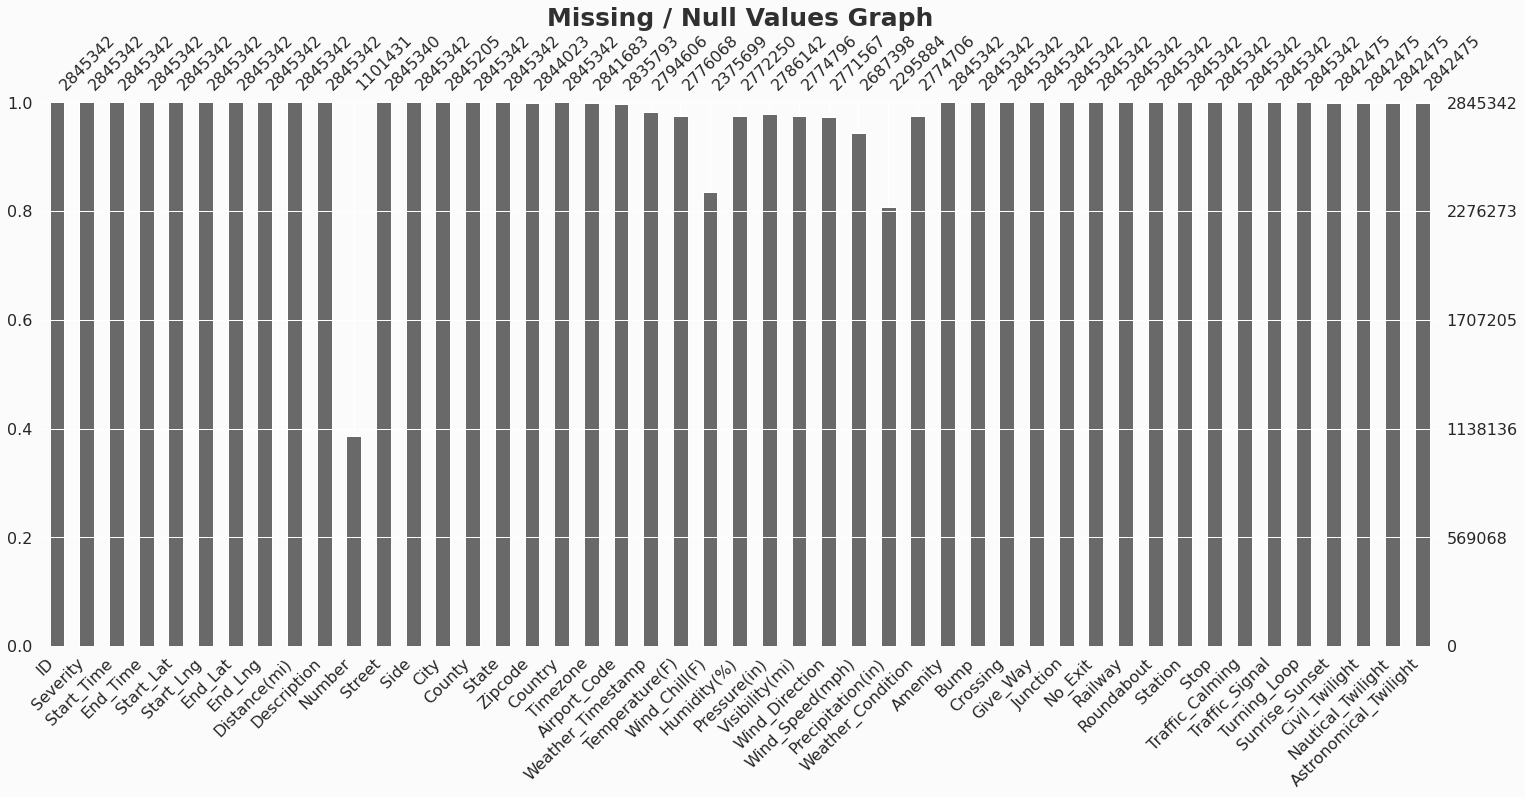

In [28]:
!pip install missingno
import missingno as msno
msno.bar(data)
plt.title('Missing / Null Values Graph', fontweight='heavy', ha='center', fontsize=25, color=colors[0])

## Delete some uncessary variables:
1. ID
2. Description
3. Airport_Code
4. Timezone
5. Start_Time 
6. End_Time                
7.  Start_Lat              
8.  Start_Lng             
9.  End_Lat              
10. End_Lng
11. Street
12. Country
13. Weather_Timestamp
14. City
15. Zipcode



## Based on Null and missing values, we also will delete:
1. Number
2. Precipitation(in)
3. Wind_Chill(F)

## Remove variabes

In [29]:
data['End_Time'] = pd.to_datetime(data['End_Time'])
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['Duration'] = data.End_Time - data.Start_Time
data.Duration.head(10)

0   0 days 06:00:00
1   0 days 06:00:00
2   0 days 06:00:00
3   0 days 06:00:00
4   0 days 06:00:00
5   0 days 06:00:00
6   0 days 06:00:00
7   0 days 06:00:00
8   0 days 06:00:00
9   0 days 06:00:00
Name: Duration, dtype: timedelta64[ns]

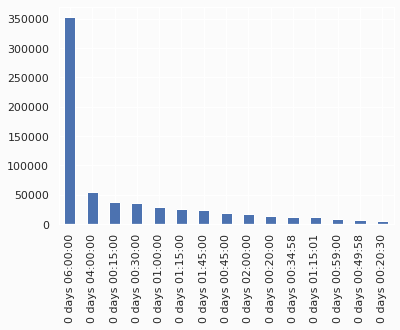

In [30]:
data.Duration.value_counts()[:15].plot(kind='bar')

In [31]:
# Check unique values of weather condition
data['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

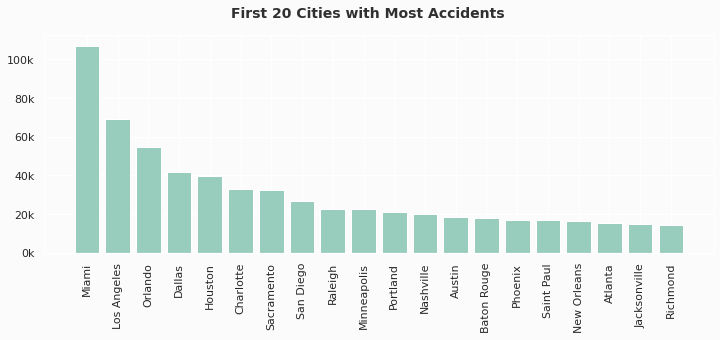

In [32]:
fig, ax = plt.subplots()
# sticker reference: https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '{x:,.0f}k'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

City_with_most_accident = data["City"].value_counts()
City_with_most_accident = data['City'].value_counts().rename_axis('States').to_frame('Counts')

fig.set_size_inches(12, 4)
ax.bar(City_with_most_accident.index[:20],(City_with_most_accident['Counts'][:20]/1000),align='center',color = colors[1])
plt.suptitle('First 20 Cities with Most Accidents', fontweight='heavy', ha='center', fontsize=14, color=colors[0]) 
plt.xticks(rotation=90)
plt.show();

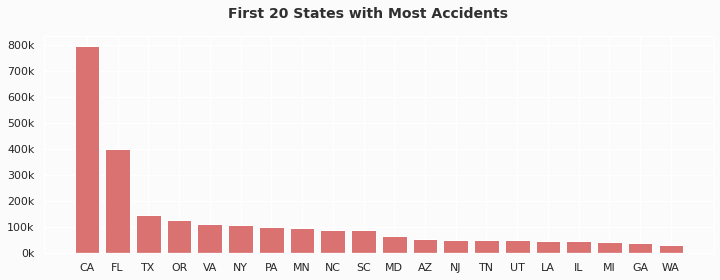

In [33]:
State_with_most_accident = data['State'].value_counts()
State_with_most_accident = data['State'].value_counts().rename_axis('States').to_frame('Counts')

fig, ax = plt.subplots()
import matplotlib.ticker as mtick
fmt = '{x:,.0f}k'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
fig.set_size_inches(12, 4)
ax.bar(State_with_most_accident.index[:20],(State_with_most_accident['Counts'][:20])/1000,align='center',color = colors[2])
plt.suptitle('First 20 States with Most Accidents', fontweight='heavy', ha='center', fontsize=14, color=colors[0]) 
plt.show();

In [34]:
fig = go.Figure(data=go.Choropleth(locations=State_with_most_accident.index,
    z = State_with_most_accident.values.astype(float),
    locationmode = 'USA-states',
    colorscale = 'amp',
    colorbar_title = "Number of Accident",))

fig.update_layout(
    title_text = 'US Accident by State',
    geo_scope='usa',
)

fig.show()

## Data preprocessing

### Delete some uncessary variables:
1. ID
2. Description
3. Airport_Code
4. Timezone
5. Start_Time 
6. End_Time                
7.  Start_Lat              
8.  Start_Lng             
9.  End_Lat              
10. End_Lng
11. Street
12. Country
13. Weather_Timestamp
14. City
15. Zipcode



### Based on Null and missing values, we also will delete:
1. Number
2. Precipitation(in)
3. Wind_Chill(F)

#### We decide to delete some categorical variables because they won't affect the severity of the car accidents. In addition, in order to futher explore the reason behind a car accident, we will add some new variables, such as the driving time and the terrain, which are consisting of the Start_Time ,End_Time, Start_Lat, End_Lat, Start_lng and End_lng.
What's more, considering the percentage of missing value, we decide to delete any variables which its percentage is over 

In [ ]:
new_data = data.drop(['ID', 'Description', 'Airport_Code', 'Timezone', 'Start_Time',
                      'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 
                      'Street', 'Country', 'Weather_Timestamp', 'City', 'Zipcode', 'Number', 'Precipitation(in)', 'Wind_Chill(F)'], axis = 1)


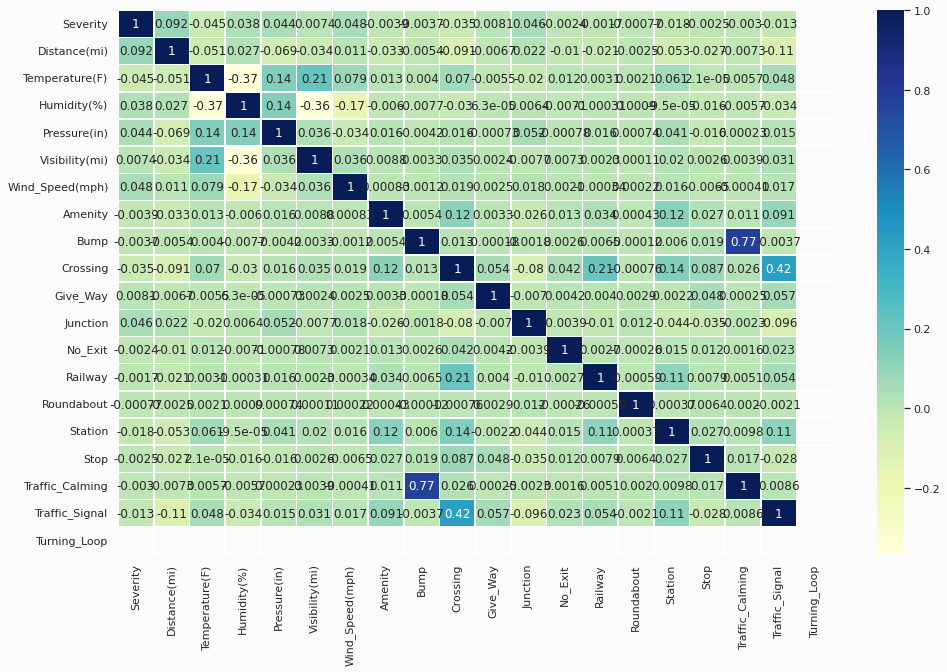

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(new_data.corr(),annot=True, linewidth=.5,cmap='YlGnBu')

In [ ]:
new_data = new_data.dropna(subset = ['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Sunrise_Sunset', 'Wind_Direction', 'Weather_Condition'])


#### Later on, we will decide whether convert 'wind_direction' and 'weather_condition' to dummy variables or drop them.

###We decided to impute the following data according to missing value and missing percentage:
Wind_Speed(mph),
Wind_Direction,
Humidity(%),
Weather_Condition,
Visibility(mi),
Temperature(F),
Pressure(in),
Astronomical_Twilight,
Sunrise_Sunset,
Civil_Twilight,
Nautical_Twilight


In [ ]:
new_data['Wind_Speed(mph)'] = new_data['Wind_Speed(mph)'].fillna(new_data['Wind_Speed(mph)'].mean())

In [ ]:
new_data['Humidity(%)'] = new_data['Humidity(%)'].fillna(new_data['Humidity(%)'].mean())

In [ ]:
new_data['Visibility(mi)'] = new_data['Visibility(mi)'].fillna(new_data['Visibility(mi)'].mean())

In [ ]:
new_data['Temperature(F)'] = new_data['Temperature(F)'].fillna(new_data['Temperature(F)'].mean())

In [ ]:
new_data['Pressure(in)'] = new_data['Pressure(in)'].fillna(new_data['Pressure(in)'].mean())

In [ ]:
new_data.isna().sum().sort_values(ascending = False)

Severity                 0
Distance(mi)             0
Astronomical_Twilight    0
Nautical_Twilight        0
Civil_Twilight           0
Sunrise_Sunset           0
Turning_Loop             0
Traffic_Signal           0
Traffic_Calming          0
Stop                     0
Station                  0
Roundabout               0
Railway                  0
No_Exit                  0
Junction                 0
Give_Way                 0
Crossing                 0
Bump                     0
Amenity                  0
Weather_Condition        0
Wind_Speed(mph)          0
Wind_Direction           0
Visibility(mi)           0
Pressure(in)             0
Humidity(%)              0
Temperature(F)           0
State                    0
County                   0
Side                     0
Duration                 0
dtype: int64